In [1]:
#default_exp word_count

# Etude des sujets des amendements PLFSS - Nuage de mots

## Affichage d'un nuage des mots les plus utilisés

In [40]:
#hide
# Put these at the top of every notebook, to get automatic reloading and inline plotting
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [41]:
#export
import pickle
import pandas as pd
from urllib.request import urlopen
from collections import Counter
from wordcloud import WordCloud

# Nuage des mots les plus utilisés
A noter que l'on peut donner une forme au nuage : https://amueller.github.io/word_cloud/auto_examples/parrot.html#sphx-glr-auto-examples-parrot-py

In [52]:
#export
amdt = None
def load_data():
    global amdt
    #data_words = pickle.load(urlopen("https://github.com/leximpact/etudes-amendements/raw/nbdev/notebook/data/amdt_data_words.pickle"))
    data_words = pickle.load(open("./data/amdt_data_words.pickle", "rb"))
    print(data_words[:20])
    #amdt = pd.read_csv('https://github.com/leximpact/etudes-amendements/raw/nbdev/notebook/data/amdt_sans_stopword.csv.gz')
    amdt = pd.read_csv('./data/amdt_sans_stopword.csv.gz')
    print(amdt.head())
    word_count = Counter(data_words)
    word_count.most_common(30)

In [53]:
#export
def build_word_cloud():
    # Join the different processed titles together.
    long_string = ' '.join(list(amdt['txt_sans_stopword'].values))
    #print(amdt['txt_sans_stopword'])
    #print(long_string)
    # Create a WordCloud object
    wordcloud = WordCloud(background_color="white", width=1000, height=800, max_words=5000, contour_width=3, contour_color='steelblue')
    # Generate a word cloud
    wordcloud.generate(long_string)
    # Visualize the word cloud
    return wordcloud

['alinéa', '6', 'substituer', 'mots', 'autorisée', 'mots', 'mise', 'œuvre', '.Rédactionnel', 'Supprimer', 'alinéa', '7.L’', 'alinéa', '7', 'prévoit', 'expérimenter', 'extension', 'lieux', 'conditions', 'prélèvement']
   Unnamed: 0                                  txt_sans_stopword
0        3835  alinéa 6 substituer mots autorisée mots mise œ...
1        1356  Supprimer alinéa 7.L’ alinéa 7 prévoit expérim...
2        3499  Supprimer alinéa 5.Cet article prévoit possibi...
3         552  I. seconde phrase alinéa article L. 245‑12 cod...
4        3766  I. lutter contre épidémie covid-19 entreprises...


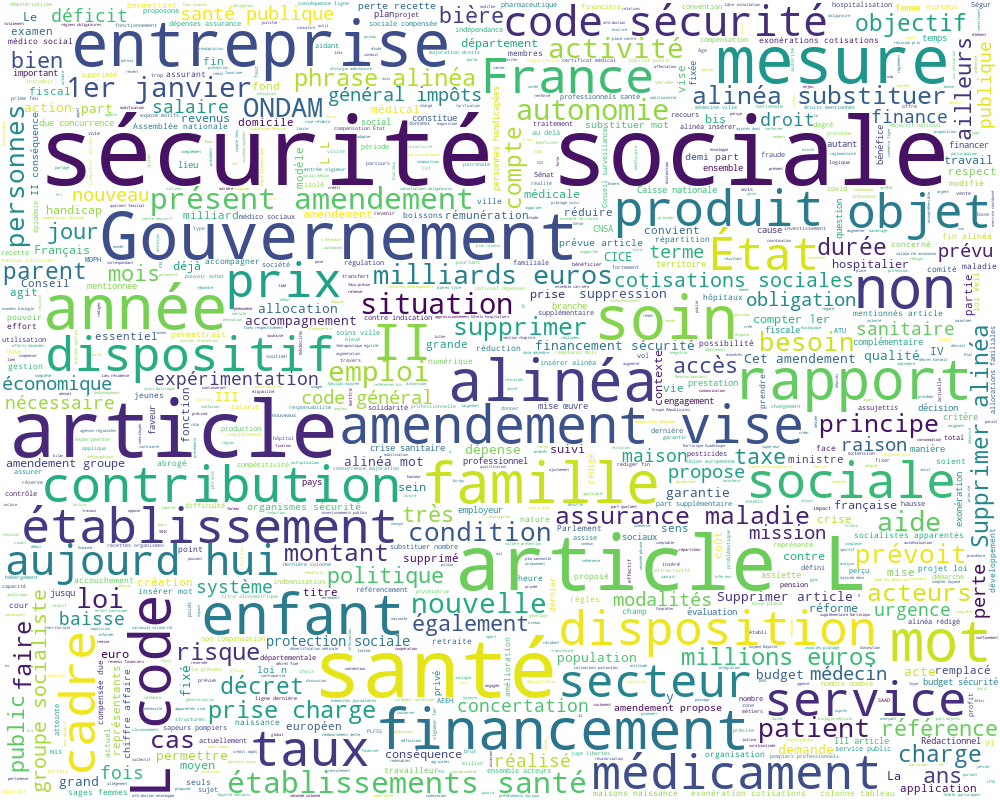

In [54]:
load_data()
build_word_cloud().to_image()

# Nuage des mots les plus utilisés, sur texte lemmatizé
A noter que l'on peut donner une forme au nuage : https://amueller.github.io/word_cloud/auto_examples/parrot.html#sphx-glr-auto-examples-parrot-py

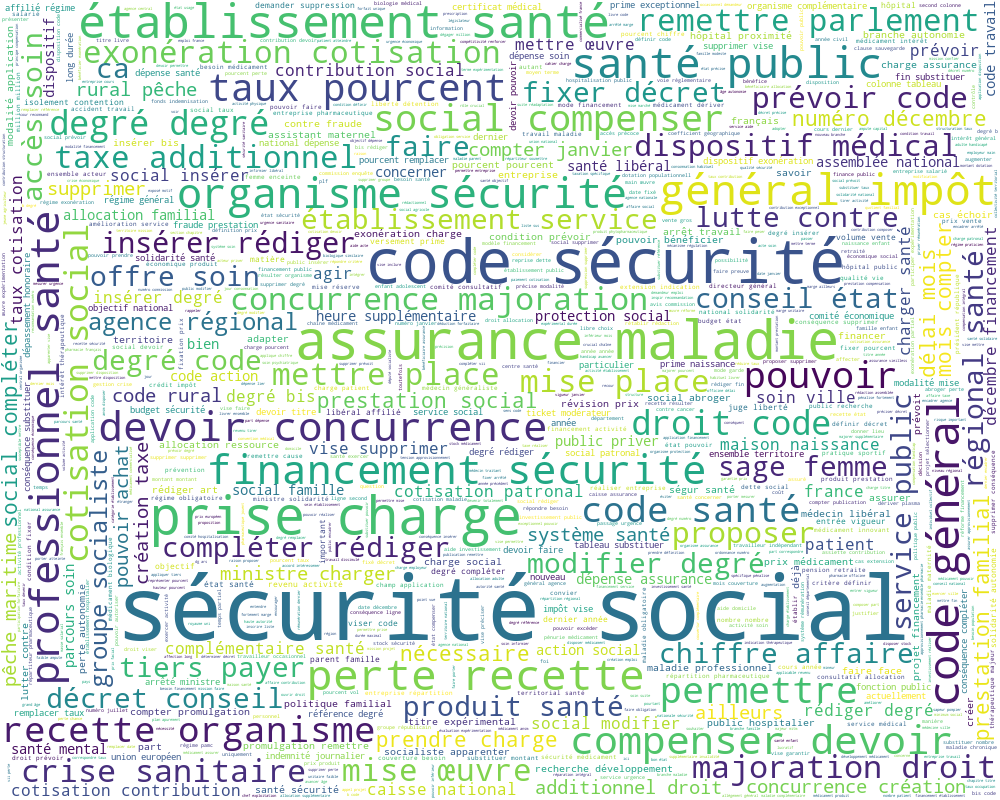

In [60]:
#export
amdt = None
def load_data():
    global amdt_new
    #data_words = pickle.load(urlopen("https://github.com/leximpact/etudes-amendements/raw/nbdev/notebook/data/amdt_data_words.pickle"))
    #data_words = pickle.load(open("data_csv/corpus.txt", "rb"))
    #print(data_words)
    #amdt = pd.read_csv('https://github.com/leximpact/etudes-amendements/raw/nbdev/notebook/data/amdt_sans_stopword.csv.gz')
    amdt_new = pd.read_csv('data_csv/amdts_cleaned_liste.csv')
    #print(amdt_new.head())
    #word_count = Counter(data_words)
    #word_count.most_common(30)
    
#export
def build_word_cloud():
    # Join the different processed titles together.
    
    long_string = ' '.join(list(amdt_new['Amdt'].values))
    # Create a WordCloud object
    wordcloud = WordCloud(background_color="white", width=1000, height=800, max_words=5000, contour_width=3, contour_color='steelblue')
    # Generate a word cloud
    wordcloud.generate(long_string)
    # Visualize the word cloud
    return wordcloud

load_data()
build_word_cloud().to_image()
cloud = build_word_cloud()
cloud.to_file('Cloud-lemmatized.png')